## Le notebook suivant est une reprise du code de Stefan Jansen avec des modifications et des variantes simplificatrices ainsi que des explications détaillées. Si vous souhaitez accéder aux ressources de Stefan Jansen vous devrez vous procurer son livre version papier ou online, payant , et vous pourrez accéder à ses répertoires de code et explications en Anglais

Voici une vidéo en Anglais qui explique très bien le concept de régression linéaire, Josh Starmer est un excellent pédagogue, il est tellement bon qu'il est possible que vous compreniez mieux sa vidéo en Anglais que n'importe quelle autre vidéo en Français, toutefois à vous de rechercher d'autre vidéos simples sur le concept pour améliorer votre compréhension
https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [3]:
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.2f}'.format 

### On commence easy par générer nous même des points de données (data) aléatoires et artificiels pour reprendre ensemble les concepts de la régression linéaire ;)

In [4]:
x = np.linspace(-10,60,100)
y = 50 + 3 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X':x, 'Y':y})

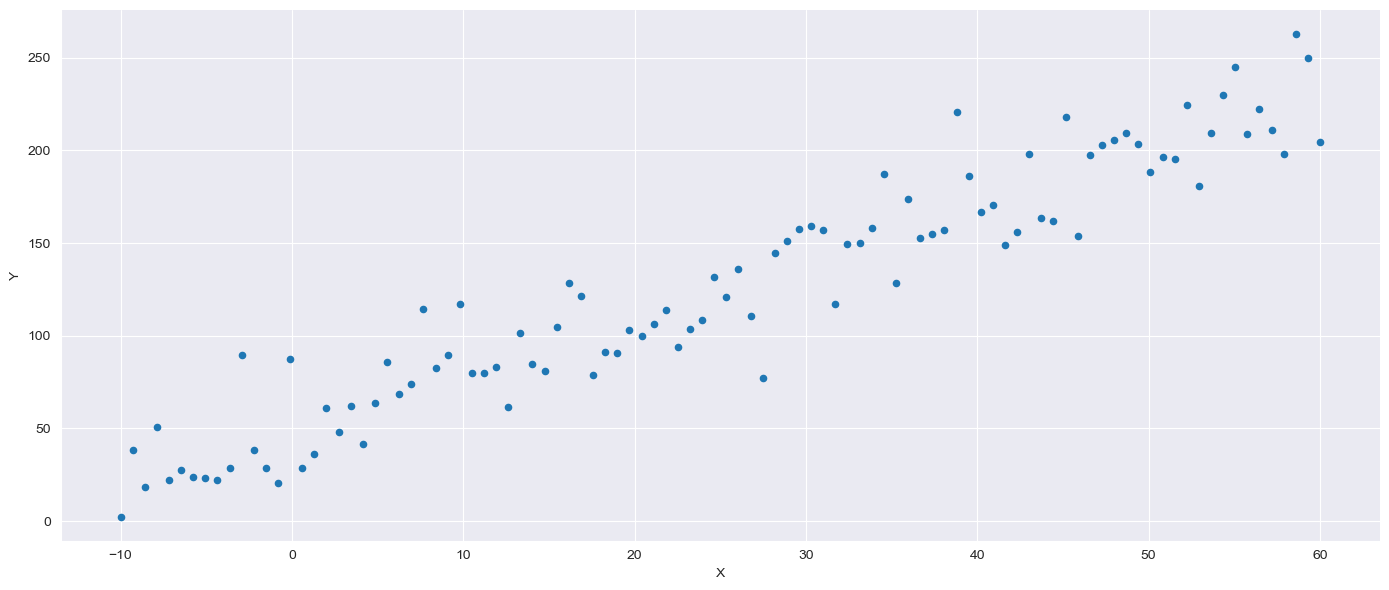

In [5]:
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine()
plt.tight_layout()

Regardez ci-dessous si lorsque je crée la variable 'y' je ne génère pas un aléa probabiliste
lancez la cellule et vous verrez à quoi ressemblent mon graphique et mes points

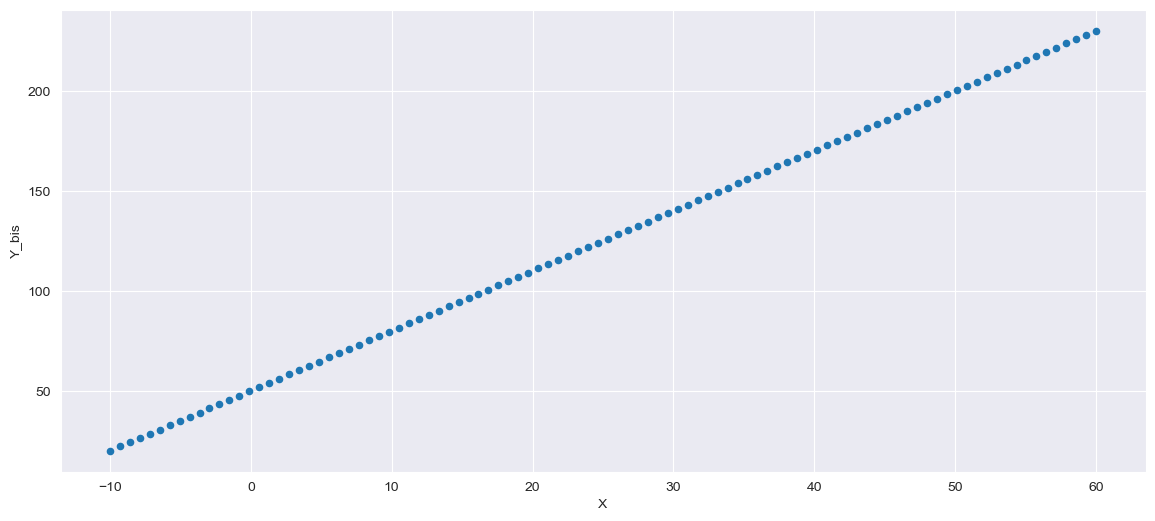

In [6]:
y_bis = 50 + 3 * x 
data_bis = pd.DataFrame({'X':x, 'Y_bis':y_bis})
ax_bis = data_bis.plot.scatter(x='X', y='Y_bis', figsize=(14,6))

#### Maintenant avec statsmodels on va estimer une régression linéaire, c'est à dire une doite qui nous permettra de réaliser des prédiction pour nos points. Autrement dit, admettons que nous disposions d'une série de points observés en bourse comme des ratio PER par exemple et qu'il nous semble à l'oeil nu qu'il existe une tendance de fond linéaire, alors notre module statsmodels va nous aider à estimer la meilleur droite possible (régression) qui nous permettra de réaliser des prédictions de ratio PER

In [7]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     971.3
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.17e-52
Time:                        12:15:03   Log-Likelihood:                -439.53
No. Observations:                 100   AIC:                             883.1
Df Residuals:                      98   BIC:                             888.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1317      3.133     15.681      0.0

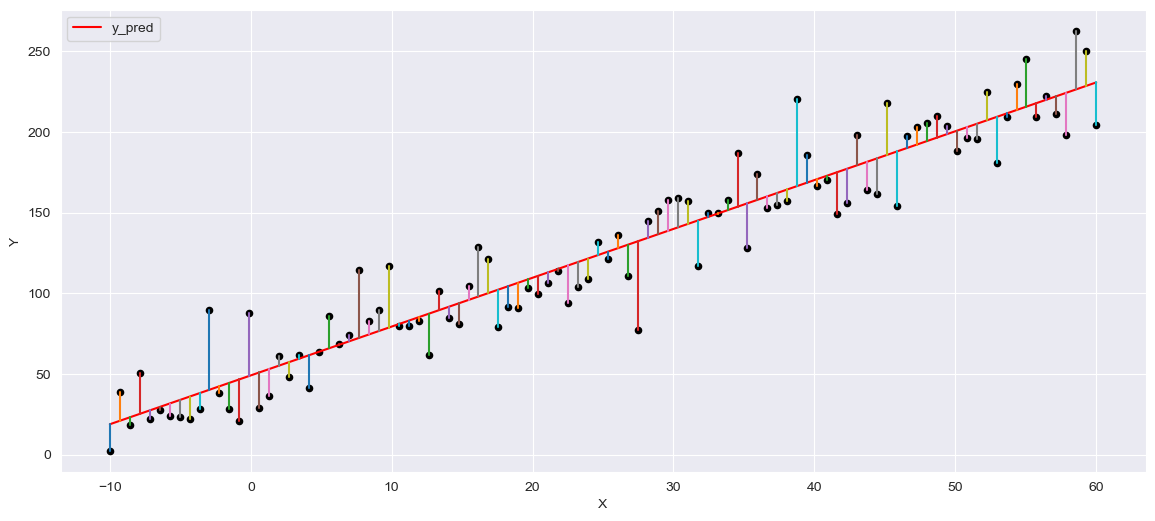

In [8]:
data['y_pred'] = model.predict()
data['residus'] = model.resid

ax = data.plot.scatter(x='X', y='Y', c='black', figsize=(14,6))
data.plot.line(x='X', y='y_pred', ax=ax, color='red')

for index, ligne in data.iterrows():
    plt.plot((ligne.X, ligne.X), (ligne.Y, ligne['y_pred'])) 

#### Dans la section précédente nous avons utilisé la régression linéaire en 2 dimensions avec une seule variable X et une variable Y. C'était une façon de dire : ma variable X explique ma variable Y. Mais dans la vraie vie il est possible que 2 variables X expliquent la variable Y. Par exemple : si mon niveau de performance demain matin à un footing est la variable 'y', alors il est possible que si j'ai passé une bonne nuit de sommeil (ma variable 'x') mon niveau soit bon. Mais si j'ai passé une mauvaise nuit de sommeil (variable x) et que j'ai bu de l'alcool toute la soirée (variable z) alors mon footing peut devenir très mauvais. Dans ce cas nous avons 2 variables qui expliquent ma performance au footing : la variable 'x' (nuit de sommeil) et la variable 'z' (quantité d'alcool ingérée hier soir)

### Création de la régression linéaire qu'on affichera sur le plan 3D

In [9]:
tableau1 = [1,2,3,4,5]
tableau2 = [10,20,30,40,50]

tableau1 = np.array(tableau1)
tableau2 = np.array(tableau2)

np.column_stack((tableau1, tableau2))

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40],
       [ 5, 50]])

Coefficients: [1.99881725 2.98815373]
Intercept: -0.022710023972320956


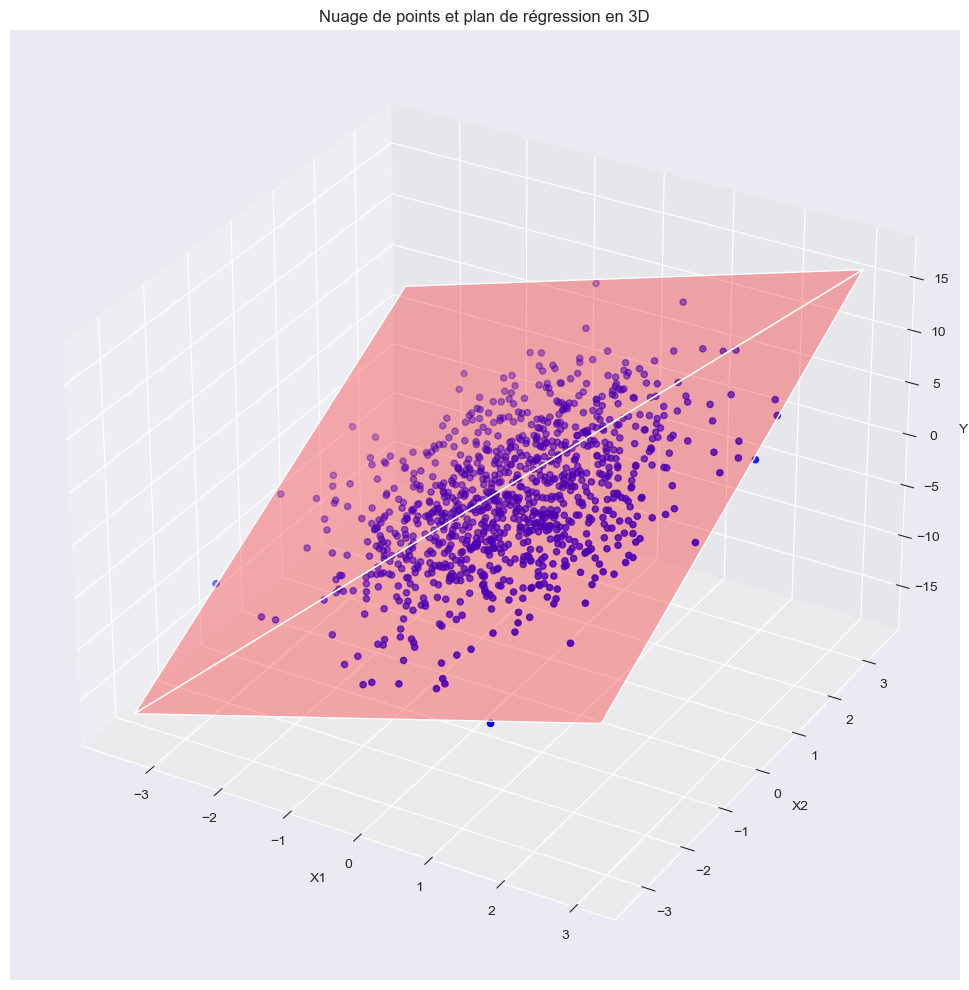

In [10]:
nombre = 1000

X1 = np.random.randn(nombre)
X2 = np.random.randn(nombre)

Y = 2*X1 + 3*X2 + np.random.randn(nombre) * 0.5

X = np.column_stack((X1, X2))

model = LinearRegression()

model.fit(X, Y)

coefficients = model.coef_

intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Y, color='blue', marker='o')

x1_min, x1_max = X1.min(), X1.max()
x2_min, x2_max = X2.min(), X2.max()

x1_surf = np.array([x1_min, x1_max, x1_min, x1_max])
x2_surf = np.array([x2_min, x2_min, x2_max, x2_max])

y_surf = intercept + coefficients[0] * x1_surf + coefficients[1] * x2_surf

ax.plot_trisurf(x1_surf, x2_surf, y_surf, color='red', alpha=0.3)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Nuage de points et plan de régression en 3D')
plt.tight_layout()
plt.show()